In [2]:
import os
os.chdir("../../../")

In [3]:
import torch
from torchts.nn.models.ode import ODESolver

import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [4]:
# Rossler Attractor equations
dt = 0.01

def s_prime(prev_val, coeffs):
    return - coeffs["g1"]*prev_val["s"]*prev_val["i"]

def e_prime(prev_val, coeffs):
    return coeffs["g1"]*prev_val["s"]*prev_val["i"] - coeffs["g2"]*prev_val["e"]

def i_prime(prev_val, coeffs):
    return coeffs["g2"]*prev_val["e"] - coeffs["a"]*prev_val["i"]

def r_prime(prev_val, coeffs):
    return coeffs["a"]*prev_val["i"]

ode = {"s": s_prime, "e": e_prime, "i": i_prime, "r": r_prime}

# Initial conditions [0,0,0]
ode_init = {"s": 0.1, "e": 0.9, "i": 0, "r": 0}

# Constants (Parameters)
ode_coeffs = {"a": 0.1, "g1": 0.3, "g2": 0.2}


# 4th Order Runge-Kutta - Data Generation for nt = 1000

In [5]:
ode_solver = ODESolver(
    ode=ode,
    init_vars=ode_init,
    init_coeffs=ode_coeffs,
    dt=dt,
    solver="rk4",
    optimizer=torch.optim.SGD,
    optimizer_args={"lr": 0.01}
)

result = ode_solver(1000)

In [6]:
result

tensor([[1.0000e-01, 9.0000e-01, 0.0000e+00, 0.0000e+00],
        [1.0000e-01, 8.9820e-01, 1.7973e-03, 8.9910e-07],
        [9.9999e-02, 8.9641e-01, 3.5892e-03, 3.5928e-06],
        ...,
        [3.3031e-02, 1.5079e-01, 4.4694e-01, 3.6924e-01],
        [3.2987e-02, 1.5053e-01, 4.4679e-01, 3.6969e-01],
        [3.2943e-02, 1.5028e-01, 4.4664e-01, 3.7014e-01]],
       grad_fn=<StackBackward>)

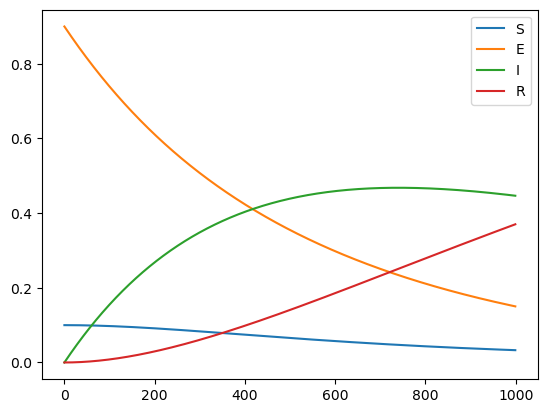

In [7]:
result_np = result.detach().numpy() # Convert to numpy array

# 2D plots
plt.plot(result_np[:,0])
plt.plot(result_np[:,1])
plt.plot(result_np[:,2])
plt.plot(result_np[:,3])

plt.legend(["S", "E", "I", "R"])

plt.show()

# Euler's method for training

In [8]:
ode_train_coeffs = {"a": 0., "g1": 0., "g2": 0.}

ode_solver = ODESolver(
    ode=ode,
    init_vars=ode_init,
    init_coeffs=ode_train_coeffs,
    dt=dt,
    solver="euler",
    optimizer=None
)

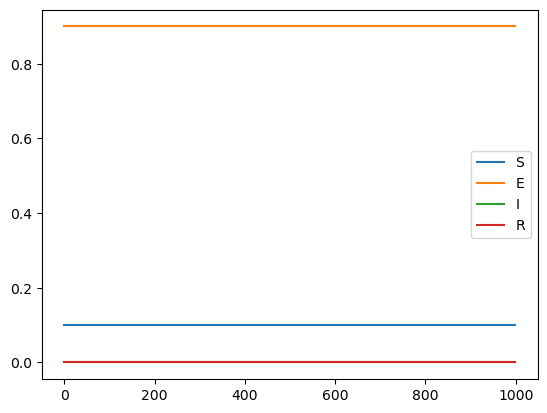

In [9]:
results_test = ode_solver(1000)
results_test_np = results_test.detach().numpy() # Convert to numpy array

# 2D plots
plt.plot(results_test_np[:,0])
plt.plot(results_test_np[:,1])
plt.plot(results_test_np[:,2])
plt.plot(results_test_np[:,3])

plt.legend(["S", "E", "I", "R"])

plt.show()

In [10]:
ode_solver.fit_random_sample(
    result,torch.optim.Adam,
    {"lr": 0.01},
    max_epochs=20
)

Epoch: 0	 Loss: tensor(5.0924e-08, grad_fn=<MseLossBackward>)
{'a': Parameter containing:
tensor(0.0251, requires_grad=True), 'g1': Parameter containing:
tensor(-0.1172, requires_grad=True), 'g2': Parameter containing:
tensor(0.0972, requires_grad=True)}
Epoch: 1	 Loss: tensor(1.7863e-09, grad_fn=<MseLossBackward>)
{'a': Parameter containing:
tensor(0.0932, requires_grad=True), 'g1': Parameter containing:
tensor(-0.1684, requires_grad=True), 'g2': Parameter containing:
tensor(0.1580, requires_grad=True)}
Epoch: 2	 Loss: tensor(1.9583e-09, grad_fn=<MseLossBackward>)
{'a': Parameter containing:
tensor(0.0967, requires_grad=True), 'g1': Parameter containing:
tensor(-0.1525, requires_grad=True), 'g2': Parameter containing:
tensor(0.1923, requires_grad=True)}
Epoch: 3	 Loss: tensor(1.8069e-09, grad_fn=<MseLossBackward>)
{'a': Parameter containing:
tensor(0.0981, requires_grad=True), 'g1': Parameter containing:
tensor(-0.0909, requires_grad=True), 'g2': Parameter containing:
tensor(0.1966, r

In [11]:
ode_solver.get_coeffs()

# Coefficients differ by at most 0.01

{'a': 0.09994413703680038, 'g1': 0.2930056154727936, 'g2': 0.19959327578544617}

# Predictions for nt = 10000

In [12]:
results_test = ode_solver(10000)
results_test

tensor([[1.0000e-01, 9.0000e-01, 0.0000e+00, 0.0000e+00],
        [1.0000e-01, 8.9820e-01, 1.7963e-03, 0.0000e+00],
        [9.9999e-02, 8.9641e-01, 3.5873e-03, 1.7953e-06],
        ...,
        [5.4107e-03, 1.9812e-06, 1.2800e-04, 9.9446e-01],
        [5.4107e-03, 1.9793e-06, 1.2787e-04, 9.9446e-01],
        [5.4107e-03, 1.9774e-06, 1.2775e-04, 9.9446e-01]],
       grad_fn=<StackBackward>)

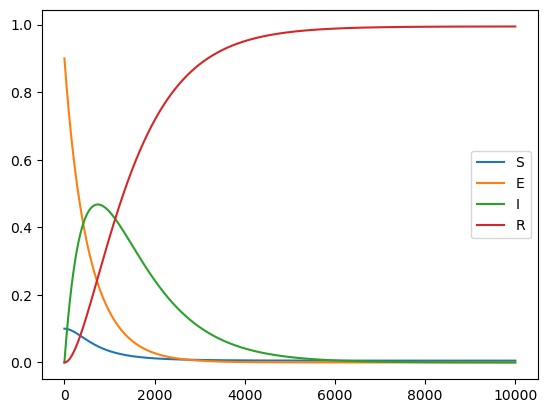

In [13]:
results_test_np = results_test.detach().numpy() # Convert to numpy array

# 2D plots
plt.plot(results_test_np[:,0])
plt.plot(results_test_np[:,1])
plt.plot(results_test_np[:,2])
plt.plot(results_test_np[:,3])

plt.legend(["S", "E", "I", "R"])

plt.show()

In [ ]:
import scipy.io.savemet as savemat

savemat("SEIR_fitRandomSample.mat", {"x": results_test_np})